In [1]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [2]:
print(tf.__version__)

2.9.1


In [3]:
mnist= tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
np.isnan(x_train).any()
np.isnan(x_test).any()


False

In [4]:
input_shape =(28,28,1)

In [5]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1], x_train.shape[2],1)
x_train=x_train /255.0
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)
x_test=x_test /255.0

In [6]:
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32),depth=10)

tf.Tensor([0. 0. 0. 0. 0. 1. 0. 0. 0. 0.], shape=(10,), dtype=float32)


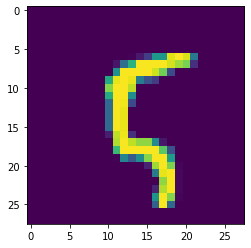

In [7]:
plt.imshow(x_train[100][:,:,0])
print(y_train[100])

In [8]:
#define the model

batch_size = 64
num_classes =10
epochs= 3

In [9]:
model= tf.keras.models.Sequential([
tf.keras.layers.Conv2D(32, (5,5), padding='same',activation='relu',input_shape=input_shape),
tf.keras.layers.Conv2D(32, (5,5), padding='same',activation='relu'),
tf.keras.layers.MaxPool2D(),
tf.keras.layers.Dropout(0.25),
tf.keras.layers.Conv2D(64,(3,3), padding='same',activation='relu'),
tf.keras.layers.Conv2D(64,(3,3), padding='same',activation='relu'),
tf.keras.layers.MaxPool2D(strides=(2,2)),
tf.keras.layers.Dropout(0.25),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dropout(0.5),
tf.keras.layers.Dense(num_classes, activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.RMSprop(epsilon=1e-08),loss='categorical_crossentropy',metrics=['acc'])

In [22]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get ('acc')>0.995):
            print("\nReached 99.5% accuracy so cancelling training!")
        self.model.stop_training =True
callbacks =myCallback()

In [23]:
history =model.fit(x_train, y_train,
                   batch_size=batch_size,
                   epochs=epochs,
                   validation_split=0.1,
                   callbacks=[callbacks])

Epoch 1/3
844/844 [==============================] - 132s 157ms/step - loss: 0.0587 - acc: 0.9831 - val_loss: 0.0309 - val_acc: 0.9910


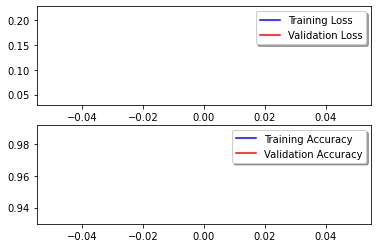

In [14]:
fig, ax= plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b',label="Training Loss")
ax[0].plot(history.history['val_loss'],color='r',label="Validation Loss",axes=ax[0])
legend =ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b',label="Training Accuracy")
ax[1].plot(history.history['val_acc'],color='r',label="Validation Accuracy")
legend =ax[1].legend(loc='best', shadow=True)

In [16]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 7s 22ms/step - loss: 0.0387 - acc: 0.9867


In [18]:
Y_pred= model.predict(x_test)
Y_pred_classes =np.argmax(Y_pred, axis=1)
Y_true=np.argmax(y_test,axis=1)
confusion_mtx= tf.math.confusion_matrix(Y_true, Y_pred_classes)

313/313 [==============================] - 7s 21ms/step


<AxesSubplot:>

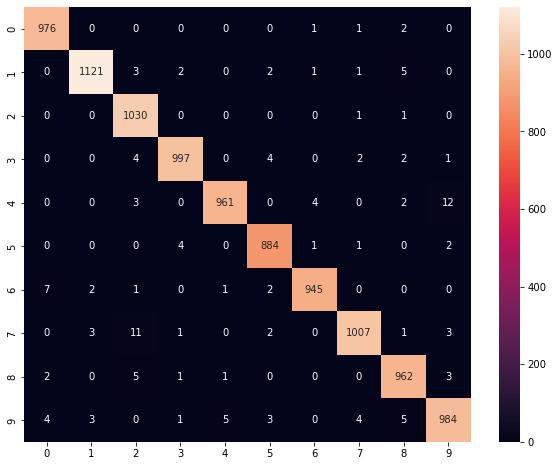

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt='g')